In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
# %matplotlib qt

In [2]:
N = 100
epsilon = 1
sigma = 1
m = 1
v_0 = np.sqrt(2*epsilon/m)
t_0 = sigma * np.sqrt(m/(2*epsilon))
timestep = 5000
delta_t = 0.001*t_0

l_space = np.array([sigma*100,sigma*100])
r_particle = np.zeros([N,2],dtype=np.float64)
v_particle = np.ones([N,2])

energy = np.zeros(timestep)
kinetic_energy = np.zeros(timestep)
potential_energy = np.zeros(timestep)

r_particle_path = np.zeros((timestep,N,2))

In [3]:
def initialize_position(r_particle,l_space,sigma):

    ## initiate position 
    for idx_i,i in enumerate(r_particle):

        all_position_ok = False ## not closer than sigma

        while all_position_ok == False:

            ## random initialize
            position_x = random.uniform(0,l_space[0])
            position_y = random.uniform(0,l_space[1])
            position_new = np.array([position_x,position_y])
            
            ## calculate distance between each particle
            position_ok = True
            for idx_j,j in enumerate(r_particle):
                if idx_i != idx_j :
                    dist = np.linalg.norm(position_new - j)
                    if dist <= 2*sigma:
                        position_ok = False
                        break
            
            ## All check clear assign new position
            if position_ok :          
                r_particle[idx_i] = position_new
                all_position_ok = True
            
    return r_particle
            
        

In [4]:
def initialize_velocity(v_particle,v_0):
    
    for idx_i,i in enumerate(v_particle):
        
        velocity_x = random.uniform(-2*v_0,2*v_0)
        ## first term for randomly generate -1 or 1 | second term for calculating euclidean distance
        velocity_y = (random.randint(0,1)*2-1) * np.sqrt((2*v_0)**2 - (velocity_x**2))
        velocity_new = np.array([velocity_x,velocity_y])

        v_particle[idx_i] = velocity_new
    
    return v_particle


In [5]:
def calculate_force(i,j,epsilon,sigma):
    r_ij = np.linalg.norm(i - j)
    r_ij_x = i[0] - j[0]
    r_ij_y = i[1] - j[1]
    f = epsilon * ( (48*(sigma**12)/(r_ij**13)) - 24*(sigma**6)/(r_ij**7))
    return np.array([f*r_ij_x/r_ij,f*r_ij_y/r_ij])


In [6]:
def calculate_potential_energy(i,j,epsilon,sigma):
    r_ij = np.linalg.norm(i - j)
    term_1 = (sigma/r_ij)**12
    term_2 = (sigma/r_ij)**6
    e = 4 * epsilon * (term_1 - term_2)
    return e

In [7]:
r_particle = initialize_position(r_particle,l_space,sigma)
v_particle = initialize_velocity(v_particle,v_0)

In [ ]:
for t in range(timestep):
    
    total_potential_energy = 0
    total_kinetic_energy = 0

    ## force reaction to each other
    for idx_i,i in enumerate(r_particle):

        total_force = np.zeros(2)

        for idx_j,j in enumerate(r_particle):
            if idx_i!=idx_j:
                f = calculate_force(i,j,epsilon,sigma)
                total_force = total_force + f
                total_potential_energy += 0.5*calculate_potential_energy(i,j,epsilon,sigma)
                
        ## leap frog algorithm
        r_half = r_particle[idx_i] + (v_particle[idx_i] * delta_t / 2)
        v_next = v_particle[idx_i] + (total_force / m * delta_t)
        r_next = r_half + (v_next * delta_t / 2)

        ## check boundary
        if r_next[0] > l_space[0] or r_next[0] < 0:
            v_next[0] = -v_next[0]
    
        if r_next[1] > l_space[1] or r_next[1] < 0:
            v_next[1] = -v_next[1]
        r_next = r_half + (v_next * delta_t / 2)

        r_particle[idx_i] = r_next
        v_particle[idx_i] = v_next

        r_particle_path[t][idx_i] = r_next

        velocity = np.sqrt(v_particle[idx_i][0]**2 + v_particle[idx_i][1]**2)
        K = 0.5 * m * (velocity**2)
        total_kinetic_energy += K

    total_energy = total_kinetic_energy + total_potential_energy

    energy[t] = total_energy
    potential_energy[t] = total_potential_energy
    kinetic_energy[t] = total_kinetic_energy
    # plt.clf()
    # plt.title(t)
    # plt.ylabel('$y$')
    # plt.xlabel('$x$')
    # plt.axis([0,l_space[0],0,l_space[1]])
    # plt.scatter(r_particle[:,0],r_particle[:,1])
    # plt.show(block=False)
    # plt.pause(0.0001)


In [9]:
def plot_instantaneous(r_particle,v_particle,r_particle_path,timestep,l_space,delta_t):
    plt.clf()
    plt.axis([0,l_space[0],0,l_space[1]])
    plt.title("Instantaneous positions and velocities at each iteration (delta t = "+str(delta_t)+"t0)")
    plt.ylabel('$y$')
    plt.xlabel('$x$')

    for t in range(timestep):
        size = 0.5
        color = "green"
        if t == timestep-1 :
            for i in range(N):
                x = r_particle[i,0]
                y = r_particle[i,1]
                dx = v_particle[i,0]
                dy = v_particle[i,1]
                plt.annotate("", xytext=(x,y),xy=(x+dx,y+dy), 
                arrowprops=dict(arrowstyle="->", color='k'), size = 15)
            size = 10
            color = "blue"
        plt.scatter(r_particle_path[t,:,0],r_particle_path[t,:,1],s=size,color=color)

Save delta t = 0.001 data

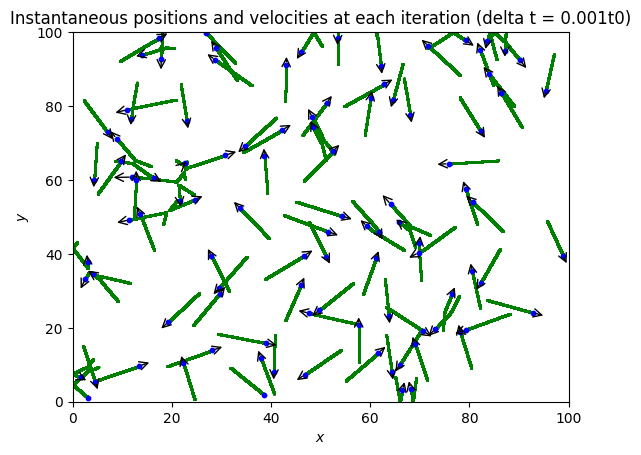

In [10]:
if delta_t == 0.001*t_0:
    potential_energy_001 = potential_energy
    kinetic_energy_001 = kinetic_energy
    energy_001 = energy
    r_particle_path_001 = r_particle_path
    r_particle_001 = r_particle
    v_particle_001 = v_particle
    
plot_instantaneous(r_particle_001,v_particle_001,r_particle_path_001,timestep,l_space,0.001)

Save delta t =0.01 data

In [11]:
if delta_t == 0.01 * t_0:
    potential_energy_01 = potential_energy
    kinetic_energy_01 = kinetic_energy
    energy_01 = energy
    r_particle_path_01 = r_particle_path
    r_particle_01 = r_particle
    v_particle_01 = v_particle
    plot_instantaneous(r_particle_01,v_particle_01,r_particle_path_01,timestep,l_space,0.01)

/var/folders/rr/b7dpcy911jd4535dlngpjxv00000gn/T/ipykernel_64957/1251807918.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 640x480 with 0 Axes>

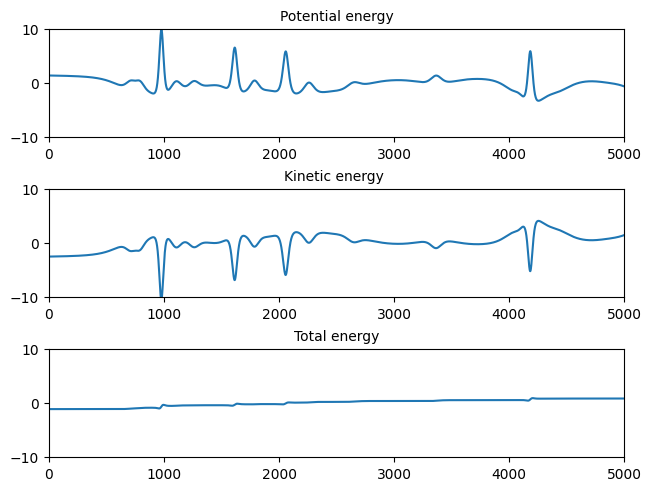

In [12]:
plt.clf()

fig, axes = plt.subplots(3, 1,constrained_layout=True)

axes[0].plot(potential_energy_001-np.mean(potential_energy_001))
# axes[0].plot(potential_energy_01-np.mean(potential_energy_01))
axes[0].axis([0,timestep,-10,10])
axes[0].set_title('Potential energy',fontsize=10)

axes[1].plot(kinetic_energy_001-np.mean(kinetic_energy_001))
# axes[1].plot(kinetic_energy_01-np.mean(kinetic_energy_01))
axes[1].axis([0,timestep,-10,10])
axes[1].set_title('Kinetic energy ',fontsize=10)

axes[2].plot(energy_001-np.mean(energy_001))
# axes[2].plot(energy_01-np.mean(energy_01))
axes[2].axis([0,timestep,-10,10])
# plt.legend(['0.001t0','0.01t0'])
axes[2].set_title('Total energy',fontsize=10)


fig.show()